In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns

footptint = emisi/areaharvested


intensity = emisi/yield

level negara

level region

level subregion

output sama dengan AM1 yang dikirimkan

In [2]:
#import dataset
df1 = pd.read_excel("D:/kerja/asisten riset/code v/step 3/GbGlct/AM1_prop_emission_crops_GFRAC_chart1.xlsx")
df2 = pd.read_excel("D:/kerja/asisten riset/code v/step 3/GbGlct/AM1_prop_emission_crops_GFRAC_chart2.xlsx")
df3 = pd.read_excel("D:/kerja/asisten riset/vol/milkunC/achaidir/IMAGE PBL/SSP2/emission_CO2_per5years_country_run5.xlsx")

In [3]:
columns_df3 = df3.columns[3:].to_list()
df3_filter = df3[columns_df3]
df3_filter_groupby = df3_filter.groupby("Process").sum()
df3_filter_groupby = df3_filter_groupby.reset_index()
df3_filter_groupby.index = df3_filter_groupby['Process']
tahun = np.array([list(range(1975, 2025, 5))])
df3_filter_groupby_thn = df3_filter_groupby[tahun[0]]

In [4]:
df3_filter_groupby_thn_T = df3_filter_groupby_thn.T
df3_filter_groupby_thn_T.head()

Process,Crop Growth,Forest Growth,Forest Harvest,LUC Crops Emission,LUC Range,Land Abandonment
1975,-10656.037808,-24739.410803,15735.528315,4107.034353,1601.806469,93.050102
1980,-17252.451738,-31484.107159,13815.249584,26286.914173,917.240527,172.166567
1985,-15054.080710,-33136.750047,11428.363929,18423.057628,1364.989485,25.069955
1990,-15721.572878,-35883.136472,10623.410675,24847.522987,852.104997,44.334458
1995,-15487.126179,-36083.715298,20070.556140,23377.439173,1305.073745,27.299180


In [5]:
df = df3_filter_groupby_thn_T.rename(columns={"Process":"Year"})
df

Process,Crop Growth,Forest Growth,Forest Harvest,LUC Crops Emission,LUC Range,Land Abandonment
1975,-10656.037808,-24739.410803,15735.528315,4107.034353,1601.806469,93.050102
1980,-17252.451738,-31484.107159,13815.249584,26286.914173,917.240527,172.166567
1985,-15054.080710,-33136.750047,11428.363929,18423.057628,1364.989485,25.069955
1990,-15721.572878,-35883.136472,10623.410675,24847.522987,852.104997,44.334458
1995,-15487.126179,-36083.715298,20070.556140,23377.439173,1305.073745,27.299180
2000,-13125.799656,-36239.531114,19850.414529,24549.611664,789.490457,46.743585
2005,-12589.385347,-38227.765947,18103.456336,21102.022971,1235.745341,57.147883
2010,-10733.461716,-37657.446339,16837.896149,27111.525086,818.822046,97.301815
2015,-11662.770770,-38940.811160,16491.721044,21365.941920,1262.422838,73.953491
2020,-10189.035229,-39346.340965,13095.325727,20557.012860,832.050533,57.210080


In [6]:
df_index = df.reset_index()
df_index = df_index.rename(columns={"index":'year'})
df_melt  = df_index.melt(id_vars='year', var_name='type', value_name='value')
df_melt.head()

,year,type,value
0,1975,Crop Growth,-10656.037808
1,1980,Crop Growth,-17252.451738
2,1985,Crop Growth,-15054.080710
3,1990,Crop Growth,-15721.572878
4,1995,Crop Growth,-15487.126179


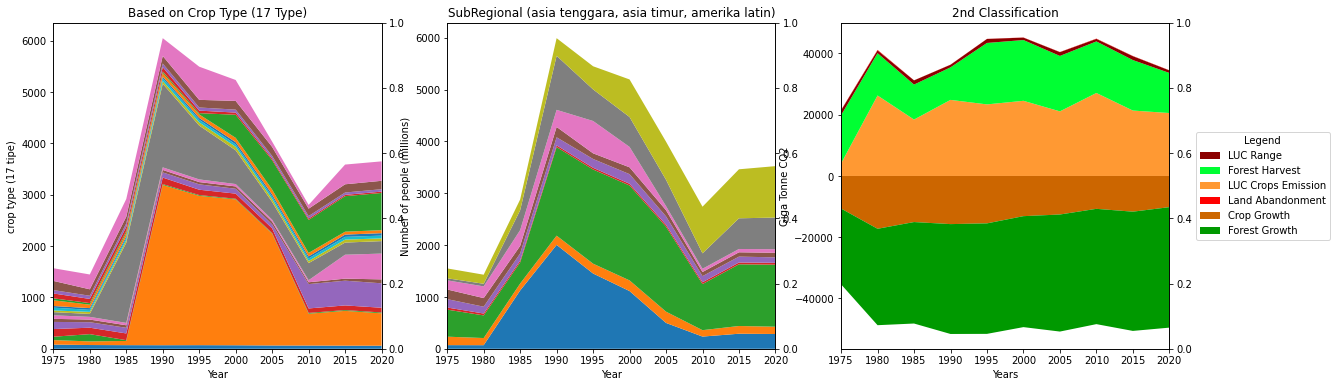

In [10]:

tahun = np.array([list(range(1975, 2025, 5))])
label = df1['type'].to_list()

plt.figure(figsize=(20, 6))
loc = plticker.MultipleLocator(base=5.0)

ax = plt.subplot(131)
ax.stackplot(tahun[0], df1[tahun[0]].values, labels=df1['type'].values)

# ax.legend(loc='upper left')
ax.set_title('Based on Crop Type (17 Type)')
ax.set_xlabel('Year')
ax.set_ylabel('crop type (17 tipe)')
ax.twinx()

ax.xaxis.set_major_locator(loc)
ax.set_xlim(tahun[0][0], tahun[0][-1])

# diganti am1 IMAGE region unit nya
ax1 = plt.subplot(132)
ax1.stackplot(tahun[0], df2[tahun[0]].values,
             labels=df2["SubRegion"].values) 
# ax1.legend(loc='upper left')
ax1.set_title('SubRegional (asia tenggara, asia timur, amerika latin)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of people (millions)')
ax1.twinx()
ax1.xaxis.set_major_locator(loc)
ax1.set_xlim(tahun[0][0], tahun[0][-1])


# scatterplot, am1 per IMAGE region, am1 yang ada di excel, am1 yang belum dibagi, sama persis file 'export_vis_footprint_intenrity' 
# data pure am 1, 5 teratas
ax2 = plt.subplot(133)

df_pos = df[df >= 0].fillna(0)
df_neg = df[df <= 0].fillna(0)

label_pos = ["LUC Crops Emission", "Forest Harvest", "LUC Range", "Land Abandonment"]
label_neg = ["Crop Growth", "Forest Growth"]
colormap_pos = ['#FF9933','#00FF33','#8B0000','#FF0000']
colormap_neg = ['#CC6600', '#009900']

positive = ax2.stackplot(tahun[0], df_pos['LUC Crops Emission'], df_pos['Forest Harvest'], df_pos['LUC Range'], df_pos['Land Abandonment'], labels=label_pos, colors=colormap_pos)
negative = ax2.stackplot(tahun[0], df_neg['Crop Growth'], df_neg['Forest Growth'], labels=label_neg, colors=colormap_neg)

handles, labels = ax2.get_legend_handles_labels()

order = [2,1,0,3,4,5]
ax2.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title='Legend',bbox_to_anchor=(1.08, 0.5), loc="center left", borderaxespad=0)
ax2.set_xlabel("Years")
ax2.set_ylabel("Giga Tonne CO2")
ax2.set_title('2nd Classification')
ax2.twinx()

ax2.xaxis.set_major_locator(loc)
ax2.set_xlim(df_pos.index[0], df_pos.index[-1])

plt.show()